# Archetypal Dog Names

Data from here: https://www.kaggle.com/kingburrito666/largest-dog-breed-data-set/data

We calculate an odds ratio for each name and breed, and use Fisher's 

In [7]:
import pandas as pd
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
from load_data import load_dog_data, get_main_breeds_df

% matplotlib inline


In [8]:
df = load_dog_data()

In [9]:
main_breeds = get_main_breeds_df(df)

In [10]:
names_by_breed = main_breeds.groupby(['breed_no_mix', 'DogName'])['LicenseType'].count()
names = main_breeds.groupby('DogName')['DogName'].count()
breeds = main_breeds.groupby('breed_no_mix')['breed_no_mix'].count()
tabulated = pd.DataFrame(names_by_breed).join(names).join(breeds)
tabulated.columns = ['name_in_breed', 'name_total', 'breed_total']
tabulated['total_dogs'] = len(main_breeds)
tabulated['name_not_breed'] = tabulated.name_total - tabulated.name_in_breed
tabulated['breed_not_name'] = tabulated.breed_total - tabulated.name_in_breed
tabulated['not_name_not_breed'] = tabulated.total_dogs - tabulated.name_not_breed
tabulated['breed_odds'] = tabulated.name_in_breed/tabulated.breed_not_name
tabulated['not_breed_odds'] = tabulated.name_not_breed/tabulated.not_name_not_breed
tabulated['odds_ratio'] = tabulated.breed_odds/tabulated.not_breed_odds

In [11]:
def apply_fisher(row):
    ratio, p_value = fisher_exact([[row.name_in_breed, row.name_not_breed],
                            [row.breed_not_name, row.not_name_not_breed]])
    return p_value


tabulated['p_value'] = tabulated.apply(apply_fisher,
                            axis=1
                            )

In [13]:
tabulated[tabulated.p_value < 0.05].loc['SFT COAT WHEAT TERR'].sort_values(by='odds_ratio', ascending=False).head(20)

,name_in_breed,name_total,breed_total,total_dogs,name_not_breed,breed_not_name,not_name_not_breed,breed_odds,not_breed_odds,odds_ratio,p_value
DogName,,,,,,,,,,,
FINNEGAN,9,101,492,151565,92,483,151473,0.018634,0.000607,30.679112,5.798208e-11
CLOVER,4,91,492,151565,87,488,151478,0.008197,0.000574,14.271528,2.316254e-04
REILLY,5,120,492,151565,115,487,151450,0.010267,0.000759,13.521114,4.876545e-05
BARKLEY,4,102,492,151565,98,488,151467,0.008197,0.000647,12.668702,3.581157e-04
BOSCO,3,80,492,151565,77,489,151488,0.006135,0.000508,12.069795,2.299445e-03
MAC,7,208,492,151565,201,485,151364,0.014433,0.001328,10.868831,6.135583e-06
PIXIE,5,152,492,151565,147,487,151418,0.010267,0.000971,10.575507,1.487419e-04
MOOSE,10,315,492,151565,305,482,151260,0.020747,0.002016,10.289096,1.094540e-07
DARBY,3,96,492,151565,93,489,151472,0.006135,0.000614,9.992216,3.849289e-03


In [18]:
tabulated[tabulated.p_value < 0.05].xs('FRANK', level='DogName').sort_values(by='odds_ratio', ascending=False).head(10)

,name_in_breed,name_total,breed_total,total_dogs,name_not_breed,breed_not_name,not_name_not_breed,breed_odds,not_breed_odds,odds_ratio,p_value
breed_no_mix,,,,,,,,,,,
PUG,25,99,2173,151565,74,2148,151491,0.011639,0.000488,23.826533,3.333589e-24
ENG SETTER,2,99,462,151565,97,460,151468,0.004348,0.000640,6.789242,3.683815e-02
W HGHLND WH TERRIER,5,99,1214,151565,94,1209,151471,0.004136,0.000621,6.664159,1.213327e-03
ENG BULLDOG,3,99,730,151565,96,727,151469,0.004127,0.000634,6.510875,1.224018e-02
DACHSHUND,11,99,4071,151565,88,4060,151477,0.002709,0.000581,4.663701,5.897946e-05
BEAGLE,1,99,9687,151565,98,9686,151467,0.000103,0.000647,0.159569,3.154731e-02


In [10]:
df['terminal_y'] = df.DogName.apply(lambda x: x[-1] == 'Y' or x[-2:] == 'IE')

In [11]:
breed_counts = df.groupby('breed_no_mix')['DogName'].count()
y_counts = df[df.breed_no_mix.map(breed_counts.to_dict()) > 4000].groupby('breed_no_mix')['terminal_y'].mean().sort_values()

In [12]:
y_counts.index = [name.title() for name in y_counts.index]

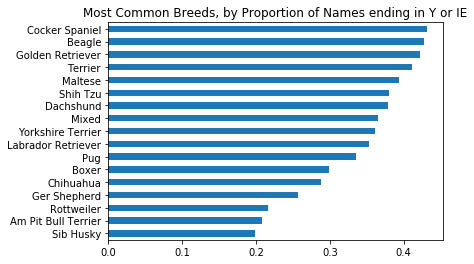

In [13]:
y_counts.plot(kind='barh')
plt.title('Most Common Breeds, by Proportion of Names ending in Y or IE')
plt.savefig('terminal_y.png', bbox_inches='tight')
plt.show()